In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize':16, 'axes.labelsize':14, 'xtick.labelsize':12, 'ytick.labelsize':12})

df = pd.read_csv("src/data/airbnb_madrid_clean_final.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29308\1790473995.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


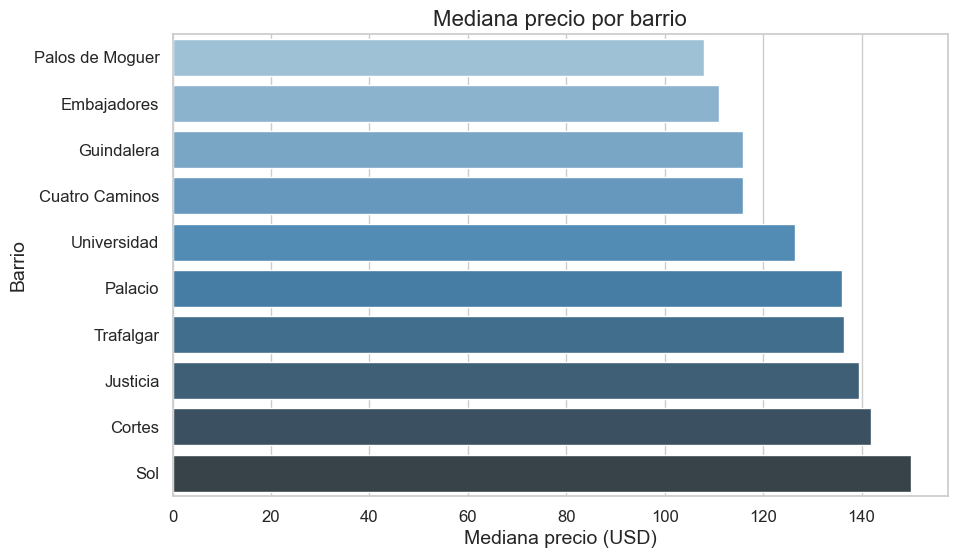

In [14]:
# Diferencias de precio entre barrios

top_neigh = df['neighbourhood_cleansed'].value_counts().head(10).index
precios_medios = df[df['neighbourhood_cleansed'].isin(top_neigh)].groupby('neighbourhood_cleansed')['price'].median().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(
    x=precios_medios.values,
    y=precios_medios.index,
    palette="Blues_d"
)
plt.xlabel("Mediana precio (USD)")
plt.ylabel("Barrio")
plt.title("Mediana precio por barrio")
plt.show()

Conclusión: El barrio influye significativamente en el precio.

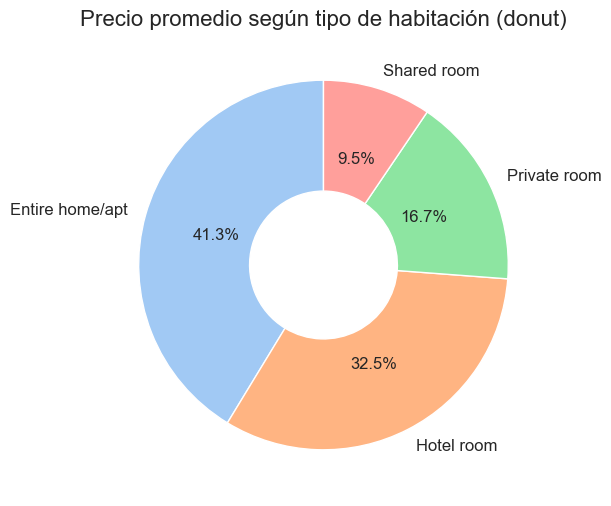

In [15]:
#  Precio según tipo de habitación

room_avg_price = df.groupby('room_type')['price'].mean()
colores = sns.color_palette('pastel')[0:len(room_avg_price)]

plt.figure(figsize=(6,6))
plt.pie(room_avg_price, labels=room_avg_price.index, autopct='%1.1f%%', startangle=90, colors=colores, wedgeprops={'width':0.6})
plt.title("Precio promedio según tipo de habitación (donut)")
plt.show()

Conclusión: El tipo de habitación afecta el precio, los alojamientos completos son más costosos.

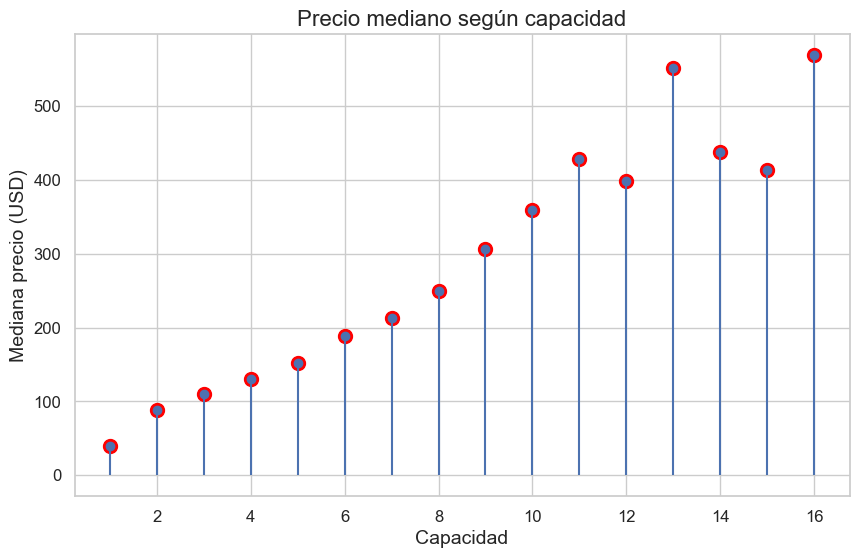

In [16]:
# Precio vs capacidad

capacidad_media = df.groupby('accommodates')['price'].median().reset_index()

plt.figure(figsize=(10,6))
plt.stem(capacidad_media['accommodates'], capacidad_media['price'], basefmt=" ")
plt.scatter(capacidad_media['accommodates'], capacidad_media['price'], color='red', s=100)
plt.title("Precio mediano según capacidad")
plt.xlabel("Capacidad")
plt.ylabel("Mediana precio (USD)")
plt.show()

Conclusión: Alojamientos más grandes tienden a ser más caros.

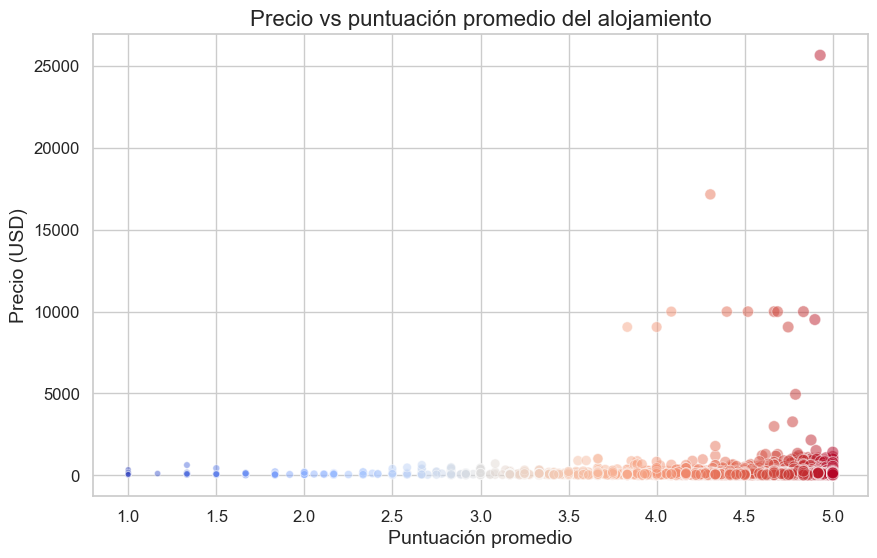

In [17]:
# Precio vs puntuaciones

df['avg_review'] = df[['review_scores_accuracy','review_scores_cleanliness',
                       'review_scores_checkin','review_scores_communication',
                       'review_scores_location','review_scores_value']].mean(axis=1)

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['avg_review'],
    y=df['price'],
    size=df['avg_review']*10,
    alpha=0.5,
    hue=df['avg_review'],
    palette='coolwarm',
    legend=False
)
plt.title("Precio vs puntuación promedio del alojamiento")
plt.xlabel("Puntuación promedio")
plt.ylabel("Precio (USD)")
plt.show()

Conclusión: Precio alto no garantiza la mejor puntuación, aunque existe cierta tendencia.

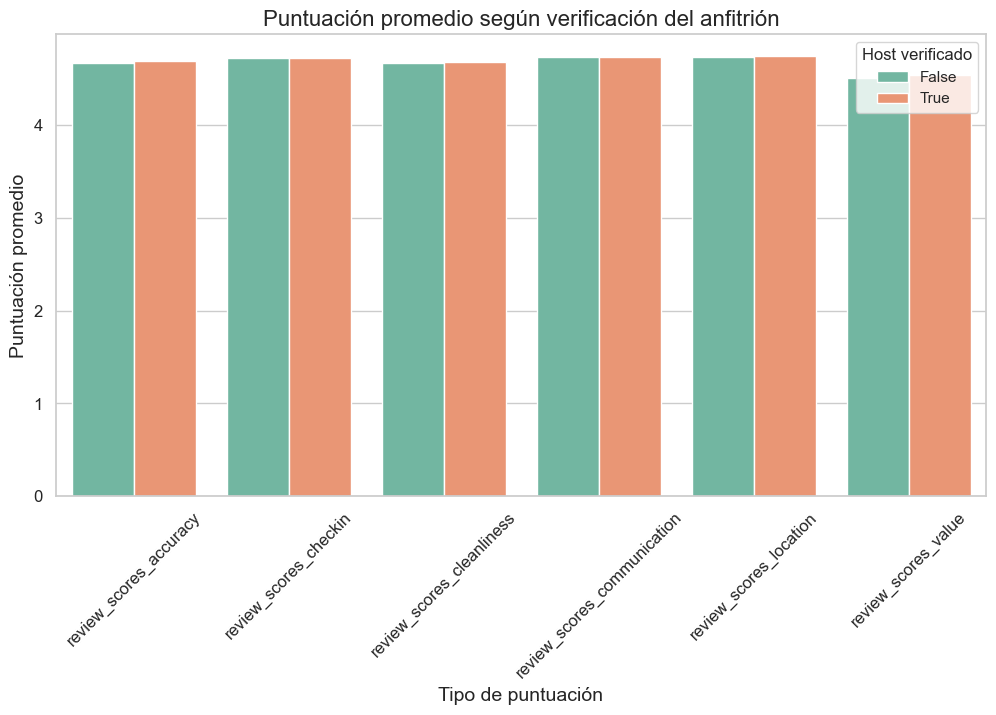

In [18]:
#  Hosts verificados

host_reviews = df.melt(id_vars=['host_identity_verified'], 
                       value_vars=['review_scores_accuracy','review_scores_cleanliness',
                                   'review_scores_checkin','review_scores_communication',
                                   'review_scores_location','review_scores_value'],
                       var_name='Tipo', value_name='Puntuación')

avg_host_review = host_reviews.groupby(['host_identity_verified','Tipo'])['Puntuación'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_host_review,
    x='Tipo',
    y='Puntuación',
    hue='host_identity_verified',
    palette='Set2'
)
plt.title("Puntuación promedio según verificación del anfitrión")
plt.xlabel("Tipo de puntuación")
plt.ylabel("Puntuación promedio")
plt.xticks(rotation=45)
plt.legend(title='Host verificado')
plt.show()


Conclusión: Verificar la identidad del anfitrión eno stá asociado a mejores valoraciones.

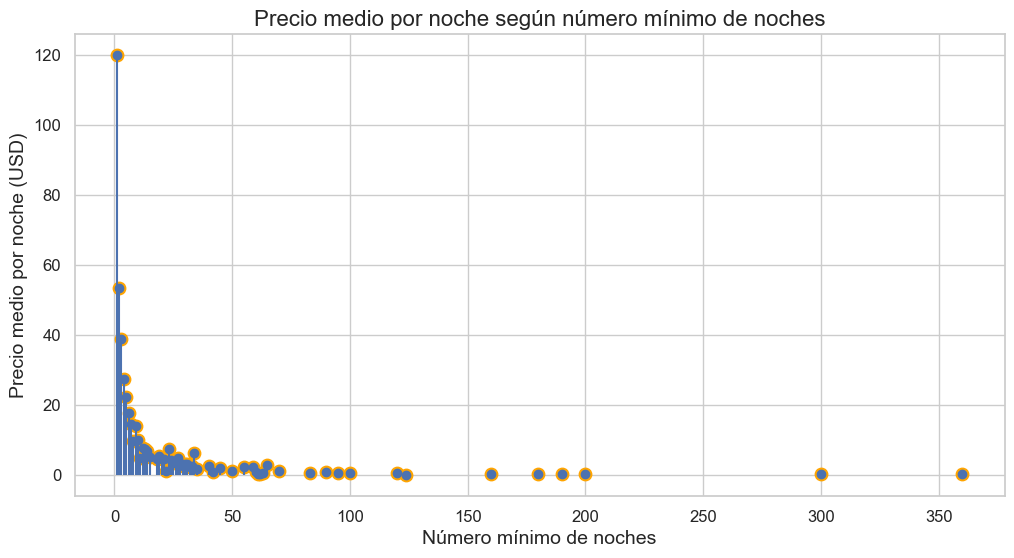

In [20]:
# Precio por noche vs número de noches


df['price_per_night'] = df['price'] / df['minimum_nights']
median_price_nights = df[df['minimum_nights']<365].groupby('minimum_nights')['price_per_night'].median().reset_index()

plt.figure(figsize=(12,6))
plt.stem(median_price_nights['minimum_nights'], median_price_nights['price_per_night'], basefmt=" ")
plt.scatter(median_price_nights['minimum_nights'], median_price_nights['price_per_night'], color='orange', s=80)
plt.title("Precio medio por noche según número mínimo de noches")
plt.xlabel("Número mínimo de noches")
plt.ylabel("Precio medio por noche (USD)")
plt.show()

Conclusión: Los alojamientos que exigen más noches tienden a ser más baratos por noche.

In [24]:
# ¿La disponibilidad del alojamiento a 30, 60 o 90 días está relacionada con el precio?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29308\4011174479.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Disponibilidad 30 días','Disponibilidad 60 días','Disponibilidad 90 días'],


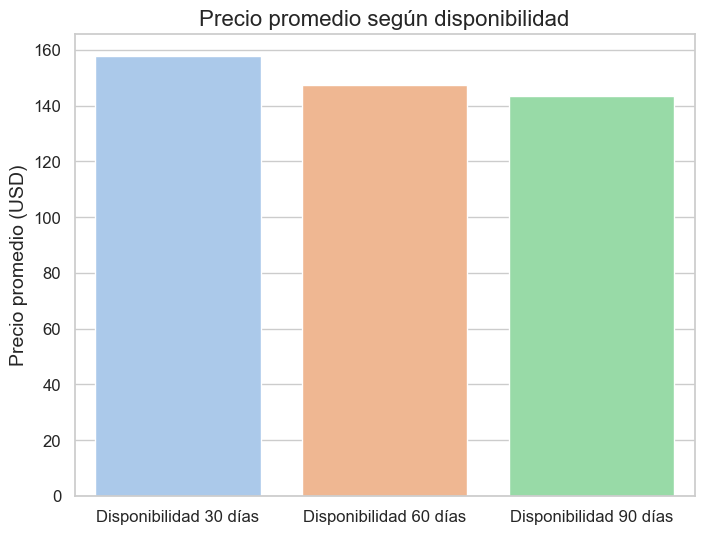

In [ ]:
# Precio promedio según disponibilidad

availability_cols = ['availability_30', 'availability_60', 'availability_90']

avg_prices = [df[['price','availability_30']].groupby('availability_30')['price'].mean().mean(),
              df[['price','availability_60']].groupby('availability_60')['price'].mean().mean(),
              df[['price','availability_90']].groupby('availability_90')['price'].mean().mean()]

plt.figure(figsize=(8,6))
sns.barplot(x=['Disponibilidad 30 días','Disponibilidad 60 días','Disponibilidad 90 días'], 
            y=avg_prices, palette='pastel')
plt.ylabel("Precio promedio (USD)")
plt.title("Precio promedio según disponibilidad")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29308\1232934574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_price_availability.keys()), y=list(avg_price_availability.values()), palette='pastel')


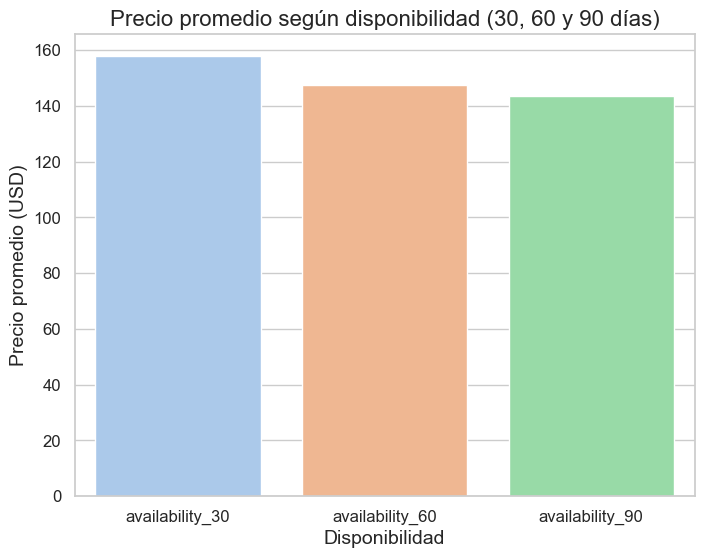

In [25]:
# Precio promedio según disponibilidad

availability_cols = ['availability_30', 'availability_60', 'availability_90']

avg_price_availability = {col: df.groupby(col)['price'].mean().mean() for col in availability_cols}

plt.figure(figsize=(8,6))
sns.barplot(x=list(avg_price_availability.keys()), y=list(avg_price_availability.values()), palette='pastel')
plt.title("Precio promedio según disponibilidad (30, 60 y 90 días)")
plt.ylabel("Precio promedio (USD)")
plt.xlabel("Disponibilidad")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29308\1063521978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[['availability_30','availability_60','availability_90']].melt(var_name='Disponibilidad', value_name='Días'),


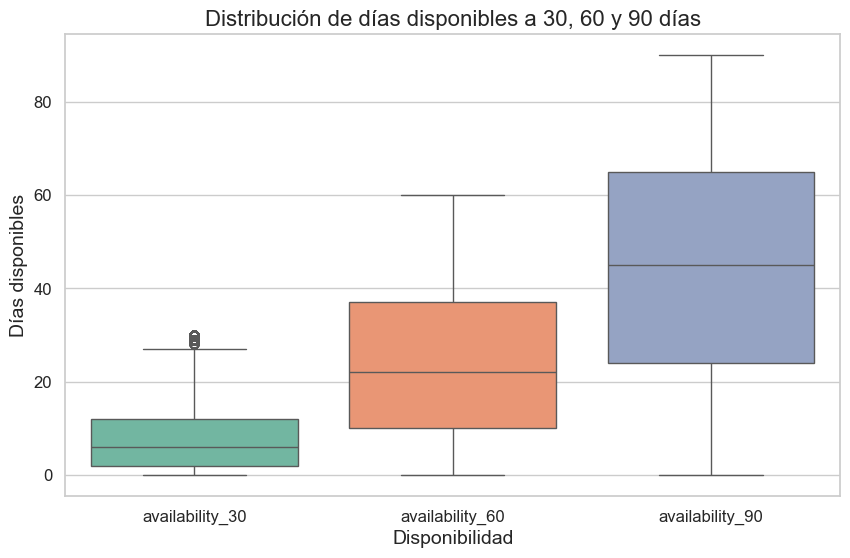

In [28]:
# Distribución de precios por disponibilidad

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['availability_30','availability_60','availability_90']].melt(var_name='Disponibilidad', value_name='Días'),
            x='Disponibilidad', y='Días', palette='Set2')
plt.title("Distribución de días disponibles a 30, 60 y 90 días")
plt.ylabel("Días disponibles")
plt.show()

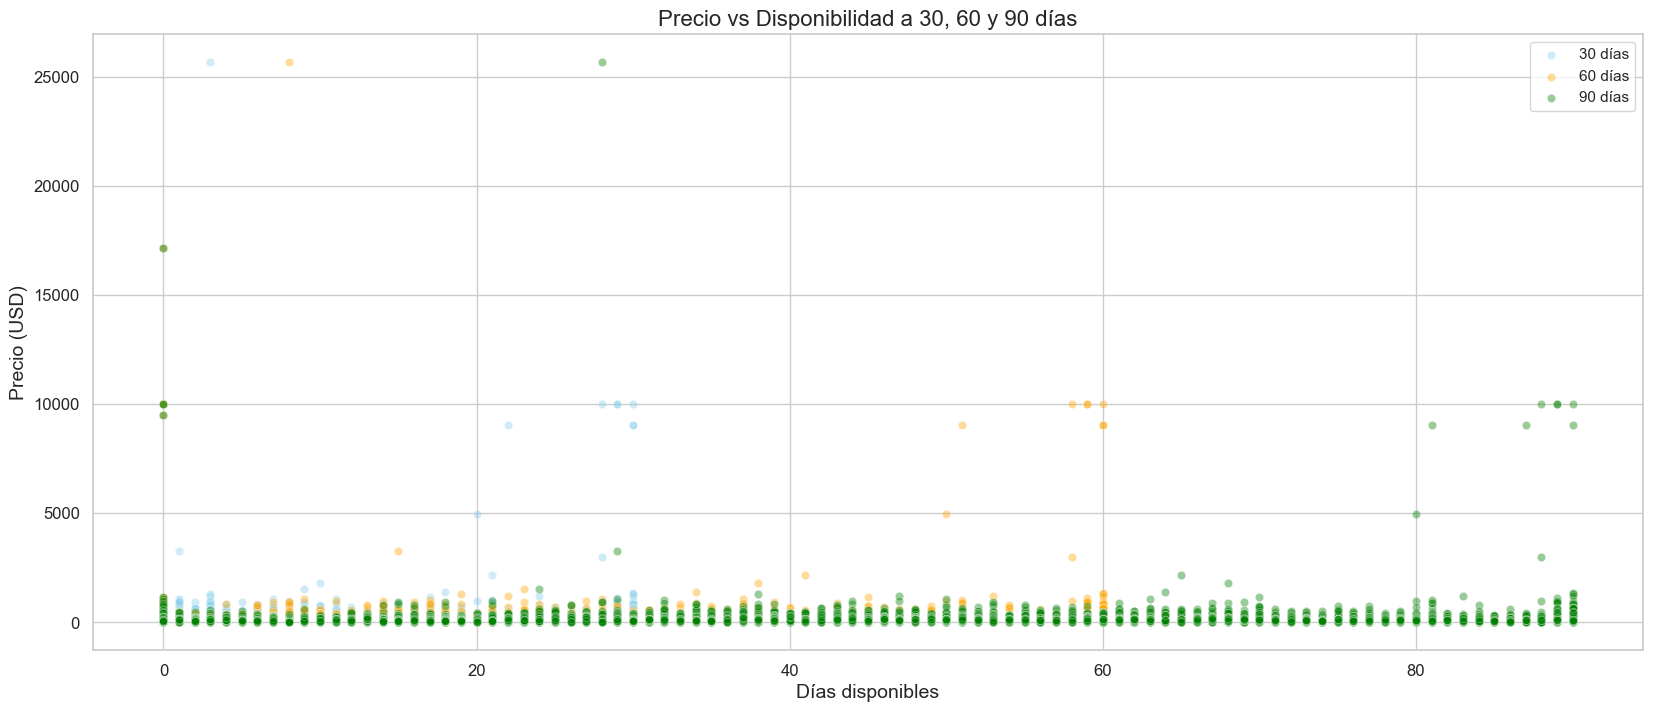

In [32]:
# Precio vs disponibilidad

plt.figure(figsize=(20,8))
sns.scatterplot(x='availability_30', y='price', data=df, alpha=0.4, color='skyblue', label='30 días')
sns.scatterplot(x='availability_60', y='price', data=df, alpha=0.4, color='orange', label='60 días')
sns.scatterplot(x='availability_90', y='price', data=df, alpha=0.4, color='green', label='90 días')
plt.title("Precio vs Disponibilidad a 30, 60 y 90 días")
plt.xlabel("Días disponibles")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()

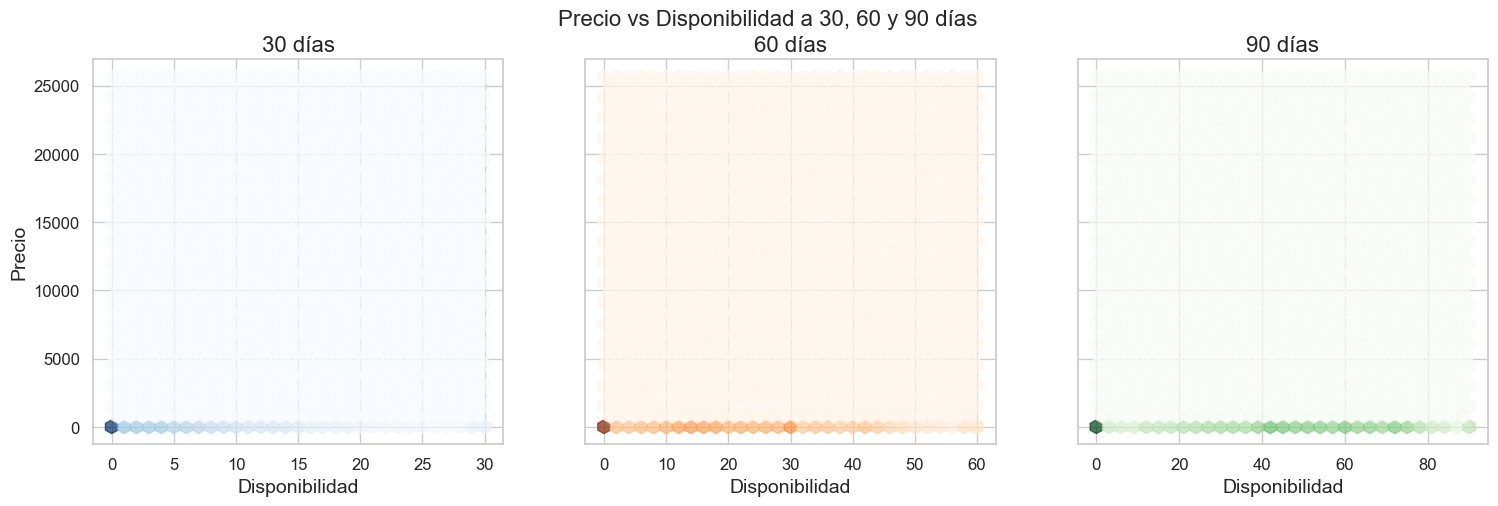

In [37]:
# oTra forma de verlo

fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

axes[0].hexbin(df['availability_30'], df['price'], gridsize=30, cmap='Blues', alpha=0.7)
axes[0].set_title('30 días')
axes[0].set_xlabel('Disponibilidad')
axes[0].set_ylabel('Precio')

axes[1].hexbin(df['availability_60'], df['price'], gridsize=30, cmap='Oranges', alpha=0.7)
axes[1].set_title('60 días')
axes[1].set_xlabel('Disponibilidad')

axes[2].hexbin(df['availability_90'], df['price'], gridsize=30, cmap='Greens', alpha=0.7)
axes[2].set_title('90 días')
axes[2].set_xlabel('Disponibilidad')

plt.suptitle('Precio vs Disponibilidad a 30, 60 y 90 días', fontsize=16)
plt.show()

- La mayoría de los alojamientos tienen alta rotación y disponibilidad limitada.

- Los precios altos son poco frecuentes y no dependen directamente de la disponibilidad: incluso las propiedades con alta disponibilidad pueden ser caras, pero son excepciones.

